In [623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso, Ridge

In [624]:
train = pd.read_csv('boston_train.csv')
test = pd.read_csv('boston_test.csv')
full_data = [train, test]

In [423]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
pd.set_option('display.max_rows', None)
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [608]:
train.drop('Id', axis = 1, inplace = True)

In [625]:
for df in full_data:
    for column in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']:
        df[column] = df[column].fillna('Na')
    
for df in full_data:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1)
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['Electrical'] = df['Electrical'].fillna('SBrkr')
    df['LotFrontage'] = df['LotFrontage'].fillna(68)
    df['MSZoning'] = df['MSZoning'].fillna('RL')
    df['Utilities'] = df['Utilities'].fillna('AllPub')
    df['Exterior1st'] = df['Exterior1st'].fillna('Other')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    df['KitchenQual'] = df['KitchenQual'].fillna('TA')
    df['Functional'] = df['Functional'].fillna('Typ')
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['SaleType'] = df['SaleType'].fillna('Oth')
    
full_data = [train, test]

In [460]:
train.isnull().sum().sum()

0

In [461]:
test.isnull().sum().sum()

0

In [411]:
for column in train.columns:
    if train[column].dtype == 'object':
        print(train[column].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Na      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
          ... 
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, Length: 25, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm    

In [469]:
corr_columns = [column for column in train.columns if train[column].dtype != 'object' and
                abs(np.corrcoef(train[column], train['SalePrice'])[0][1]) >= 0.5]

<AxesSubplot:>

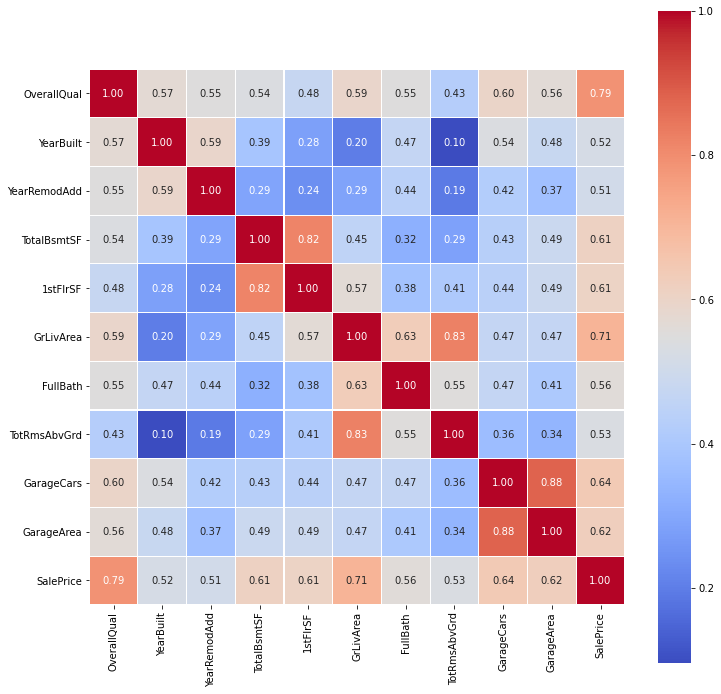

In [470]:
top_corr = train[corr_columns].corr()
plt.figure(figsize = (12, 12))
sns.heatmap(top_corr, annot=True, square=True, linewidths=.1, fmt = '.2f', cmap = 'coolwarm')

<AxesSubplot:xlabel='OverallQual', ylabel='TotalBsmtSF'>

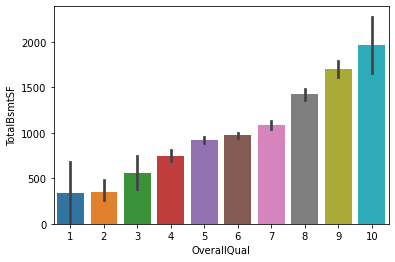

In [307]:
# 지하 면적의 대한 자재와 마감재
sns.barplot(data = train, x = 'OverallQual', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='OverallQual', ylabel='TotalBsmtSF'>

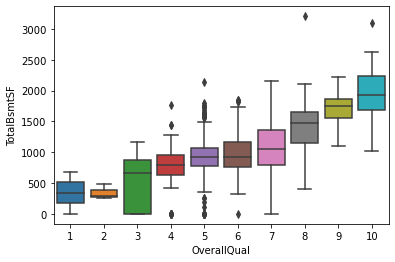

In [477]:
# 지하 면적의 대한 자재와 마감재
sns.boxplot(data = train, x = 'OverallQual', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>

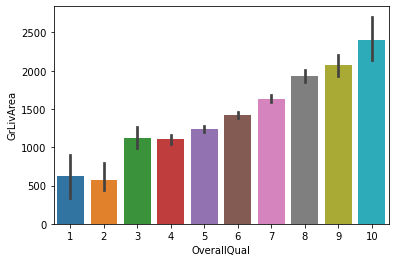

In [311]:
# 마감상태의 대비 지상면적
sns.barplot(data = train, x = 'OverallQual', y = 'GrLivArea')

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>

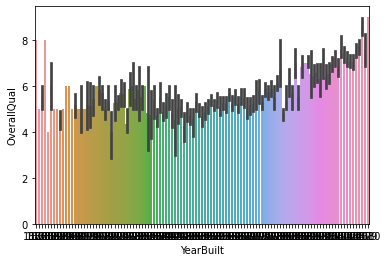

In [304]:
# 연식의 대한 자재와 마감재
sns.barplot(data = train, x = 'YearBuilt', y = 'OverallQual')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='OverallQual'>

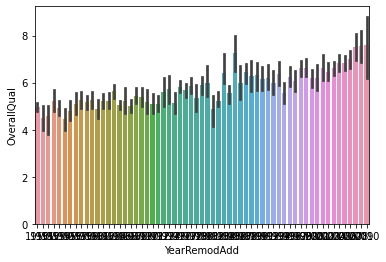

In [305]:
#리모델링 연식에 대한 자재와 마감재
sns.barplot(data = train, x = 'YearRemodAdd', y = 'OverallQual')

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

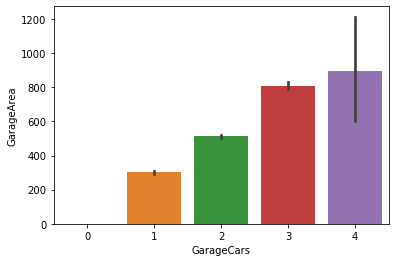

In [284]:
# 차의 갯수에 따른 지상 평수
sns.barplot(data = train, x = 'GarageCars', y = 'GarageArea')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

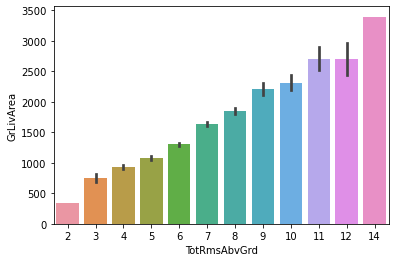

In [281]:
# 방의 갯수에 따른 지상 평수
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'GrLivArea')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

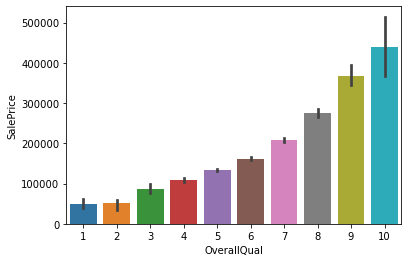

In [14]:
#집의 퀄리티 대비 가격
sns.barplot(data = train, x = 'OverallQual', y = 'SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

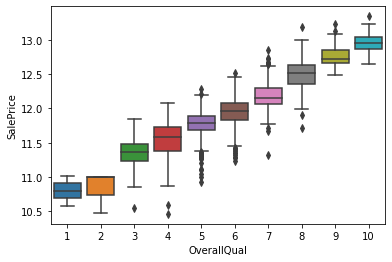

In [487]:
#집의 퀄리티 대비 가격
sns.boxplot(data = train, x = 'OverallQual', y = 'SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

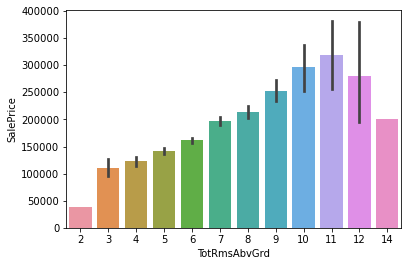

In [15]:
#방 갯수 (욕실 제외)
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

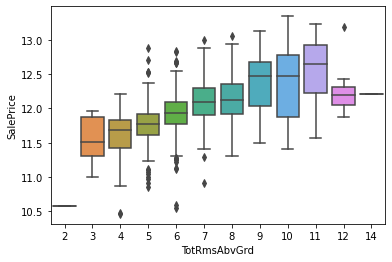

In [488]:
#방 갯수 (욕실 제외)
sns.boxplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

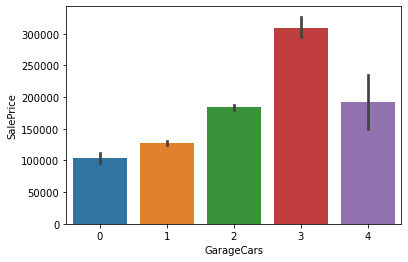

In [16]:
# 자동차 수용공간 대비 가격
sns.barplot(data = train, x = 'GarageCars', y = 'SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

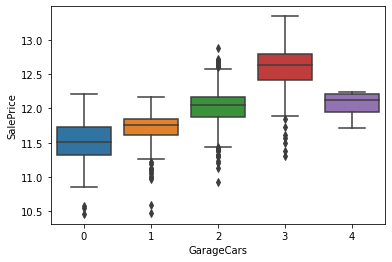

In [489]:
# 자동차 수용공간 대비 가격
sns.boxplot(data = train, x = 'GarageCars', y = 'SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

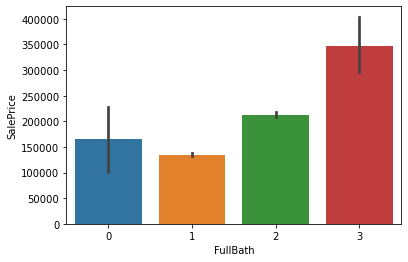

In [17]:
# 욕실 갯수
sns.barplot(data = train, x = 'FullBath', y = 'SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

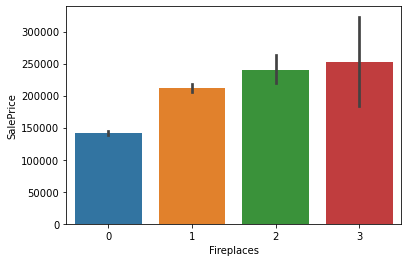

In [18]:
# 벽난로 갯수
sns.barplot(data = train, x = 'Fireplaces', y = 'SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

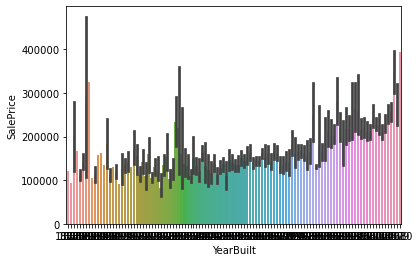

In [19]:
#연식대비 가격
sns.barplot(data = train, x = 'YearBuilt', y = 'SalePrice')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

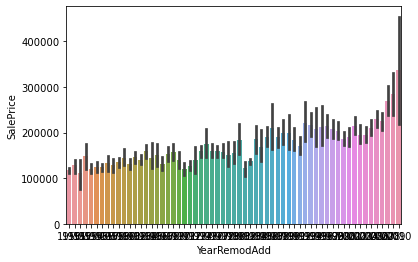

In [20]:
#리모델링 연식대비 가격
sns.barplot(data = train, x = 'YearRemodAdd', y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='TotalBsmtSF'>

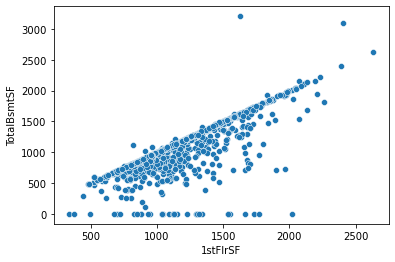

In [283]:
#지하 면적 대비 가격
sns.scatterplot(data = train, x = '1stFlrSF', y = 'TotalBsmtSF')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

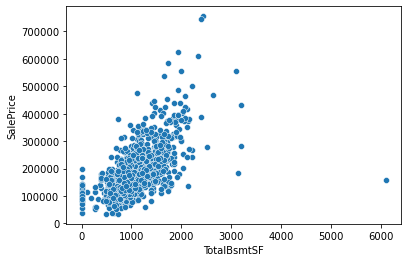

In [21]:
#지하 면적 대비 가격
sns.scatterplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

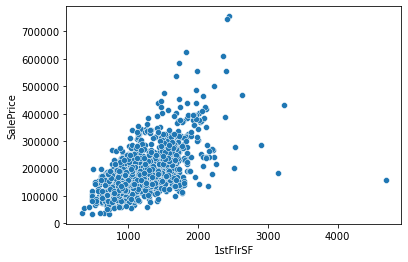

In [22]:
#1층 면적 대비 가격
sns.scatterplot(data = train, x = '1stFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

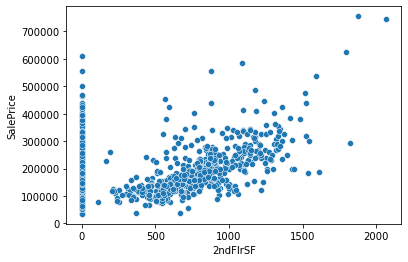

In [23]:
#2층 면적 대비 가격
sns.scatterplot(data = train, x = '2ndFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

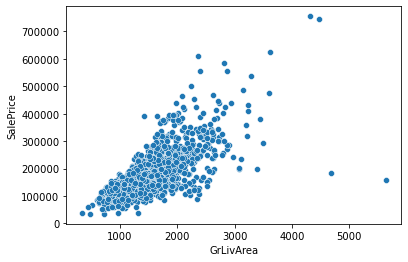

In [24]:
# 지상 면적 대비 가격
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

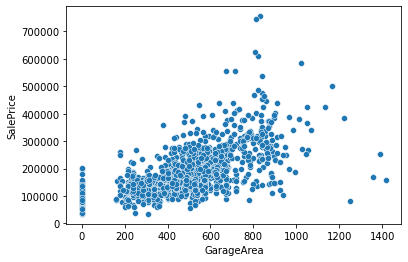

In [25]:
# 차고 면적 대비 가격
sns.scatterplot(data = train, x = 'GarageArea', y = 'SalePrice')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

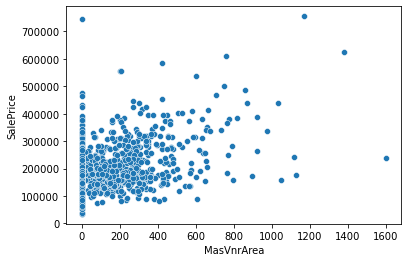

In [26]:
# 석조 베니어(?) 면적 대비 가격
sns.scatterplot(data = train, x = 'MasVnrArea', y = 'SalePrice')

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

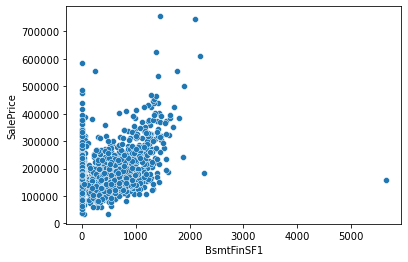

In [27]:
# 지하1층 면적 대비 가격
sns.scatterplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

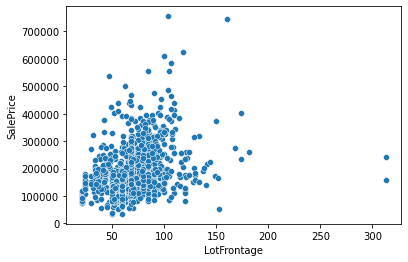

In [28]:
# 도로까지 거리??
sns.scatterplot(data = train, x = 'LotFrontage', y = 'SalePrice')

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

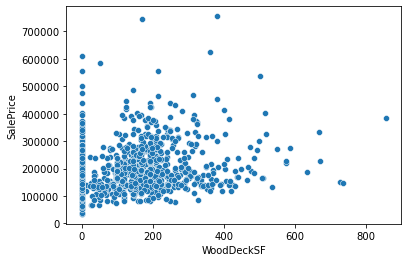

In [29]:
sns.scatterplot(data = train, x = 'WoodDeckSF', y = 'SalePrice')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

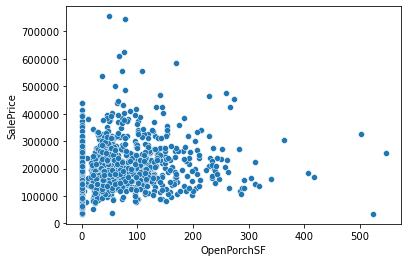

In [30]:
sns.scatterplot(data = train, x = 'OpenPorchSF', y = 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

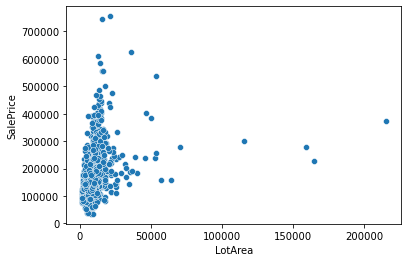

In [31]:
sns.scatterplot(data = train, x = 'LotArea', y = 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

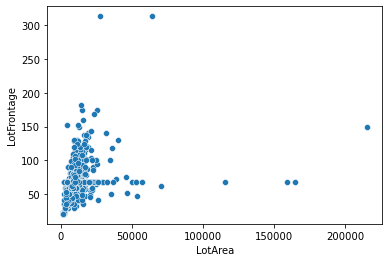

In [293]:
sns.scatterplot(data = train, x = 'LotArea', y = 'LotFrontage')

<AxesSubplot:xlabel='LotArea', ylabel='1stFlrSF'>

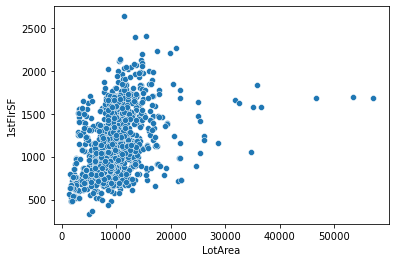

In [303]:
sns.scatterplot(data = train, x = 'LotArea', y = '1stFlrSF')

In [626]:
# outlier_delete
train = train.drop(train[train['TotalBsmtSF'] > 5000].index, axis = 0)
train = train.drop(train[train['1stFlrSF'] > 4000].index, axis = 0)
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index, axis = 0)
train = train.drop(train[(train['GarageArea'] > 12000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['GarageArea'] > 12000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['MasVnrArea'] == 0) & (train['SalePrice'] > 200000)].index, axis = 0)
train = train.drop(train[(train['MasVnrArea'] > 1000) & (train['SalePrice'] < 300000)].index, axis = 0)
train = train.drop(train[(train['BsmtFinSF1'] == 0) & (train['SalePrice'] > 500000)].index, axis = 0)
train = train.drop(train[(train['WoodDeckSF'] == 0) & (train['SalePrice'] > 600000)].index, axis = 0)
train = train.drop(train[(train['SalePrice'] > 700000)].index, axis = 0)
train = train.drop(train[(train['LotArea'] > 100000)].index, axis = 0)
train = train.drop(train[(train['LotArea'] > 100000) | (train['LotFrontage'] > 250)].index, axis = 0)
full_data = [train, test]

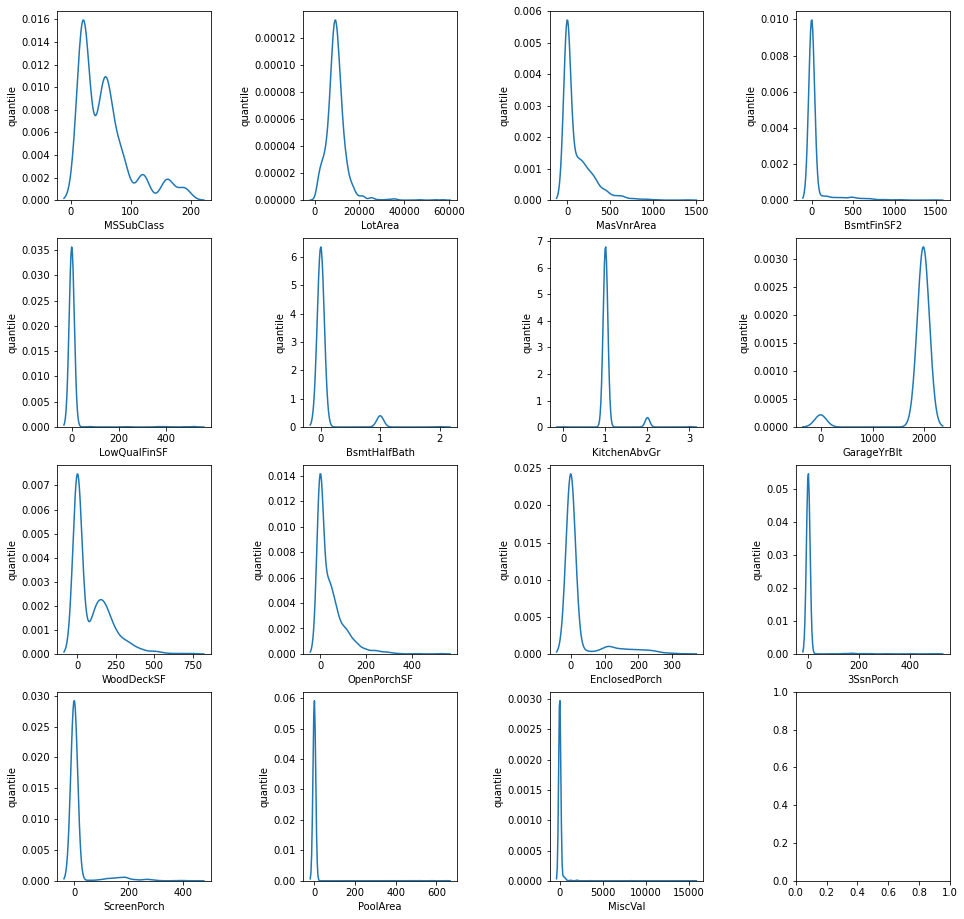

In [164]:
skew_columns = train.skew()[abs(train.skew()) > 1].index
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (16, 16))
for i, column in enumerate(skew_columns):
    sns.kdeplot(x = train[column], ax=ax[i//4][i%4])
    ax[i//4][i%4].set_ylabel('quantile')

plt.subplots_adjust(wspace=0.6)

In [627]:
for df in full_data:
    df['LotArea'] = np.log1p(df['LotArea'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [632]:
train_copy = train.copy()
test_copy = test.copy()

full_data = [train_copy, test_copy]
#feature engineer
for df in full_data:
    df['Rms_Gr_Mul'] = df['TotRmsAbvGrd'] * df['GrLivArea']
    df['1st_Bsmt_Sum'] = df['1stFlrSF'] + df['TotalBsmtSF']
    df['Car_Area_Mul'] = df['GarageCars'] * df['GarageArea']
    df['Bsmt_Qual_Mul'] = df['TotalBsmtSF'] * df['OverallQual']
    df['Has_Garage'] = df['GarageCars'].apply(lambda x : 1 if x > 0 else 0)
    df['Has_Bsmt'] = df['TotalBsmtSF'].apply(lambda x : 0 if x == 0 else 1)
    df['Is_Venner'] = df['MasVnrType'].apply(lambda x : 0 if x == 'None' else 1)
    
    df['ExterQual'] = df['ExterQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
    df['BsmtQual'] = df['BsmtQual'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
    
    df.drop(['Utilities', 'Exterior1st'], axis = 1, inplace = True)

In [633]:
# before feature engineer : 0.1147
# after feature enginner : 1130
data = pd.get_dummies(pd.concat([train_copy, test_copy], axis = 0))

train_copy = data[:len(train)]
test_copy = data[len(train):]

target = train_copy['SalePrice']
test_id = test['Id']
train_copy.drop(['Id', 'SalePrice'], axis = 1, inplace = True)
test_copy.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

ridge = make_pipeline(RobustScaler(), Ridge())

print(round(np.sqrt(-cross_val_score(ridge, train_copy, target, cv = 10, n_jobs = -1, scoring='neg_mean_squared_error')).mean(), 4))

0.113


In [ ]:
ridge.fit(train_copy, target)
y_pred = ridge.predict(test_copy)

submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
submission.to_csv('boston_house_outlier.csv', index = False)

<AxesSubplot:xlabel='Has_Garage', ylabel='SalePrice'>

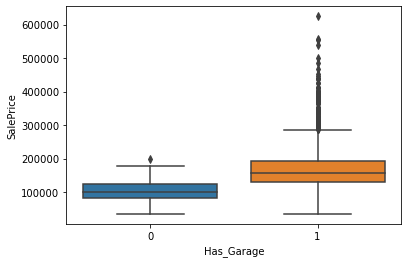

In [502]:
sns.boxplot(data = train, x = 'Has_Garage', y = 'SalePrice')

In [577]:
(train['YearRemodAdd'] - train['YearBuilt']).value_counts()

0      675
1      186
30      19
2       14
9       14
25      13
35      13
19      10
34      10
40      10
36       9
10       9
14       9
11       8
26       8
50       8
18       8
20       7
24       7
27       7
29       7
46       7
32       6
54       6
22       6
47       6
5        6
28       6
43       6
33       6
39       5
49       5
71       5
52       5
38       5
57       5
17       4
44       4
31       4
4        4
23       4
53       4
3        4
88       4
77       4
78       4
72       4
83       4
60       3
13       3
8        3
79       3
80       3
70       3
82       3
45       3
68       3
67       3
16       3
65       3
89       3
62       3
55       3
61       3
75       3
81       2
21       2
85       2
86       2
12       2
59       2
96       2
37       2
58       2
93       2
41       2
42       2
69       2
92       2
15       2
87       2
63       2
90       2
73       2
7        1
6        1
121      1
48       1
100      1
111      1
110      1

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

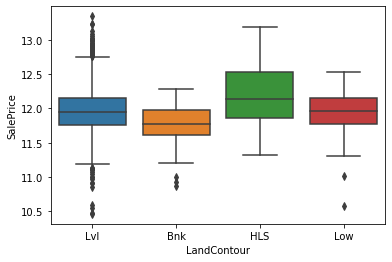

In [533]:
sns.boxplot(data = train, x = 'LandContour', y = 'SalePrice')

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

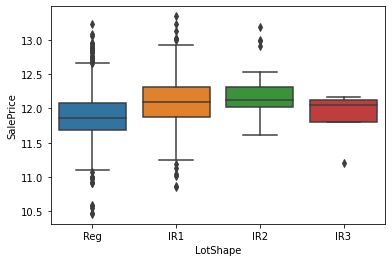

In [535]:
sns.boxplot(data = train, x = 'LotShape', y = 'SalePrice')

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

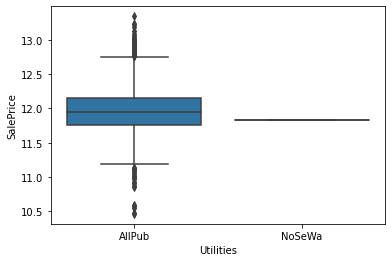

In [537]:
sns.boxplot(data = train, x = 'Utilities', y = 'SalePrice')

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

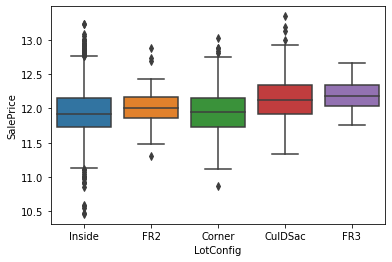

In [543]:
sns.boxplot(data = train, x = 'LotConfig', y = 'SalePrice')

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

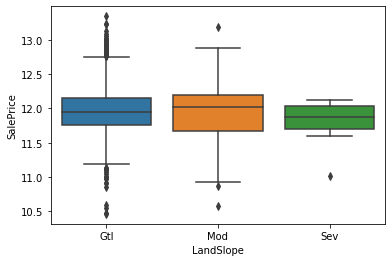

In [556]:
sns.boxplot(data = train, x = 'LandSlope', y = 'SalePrice')

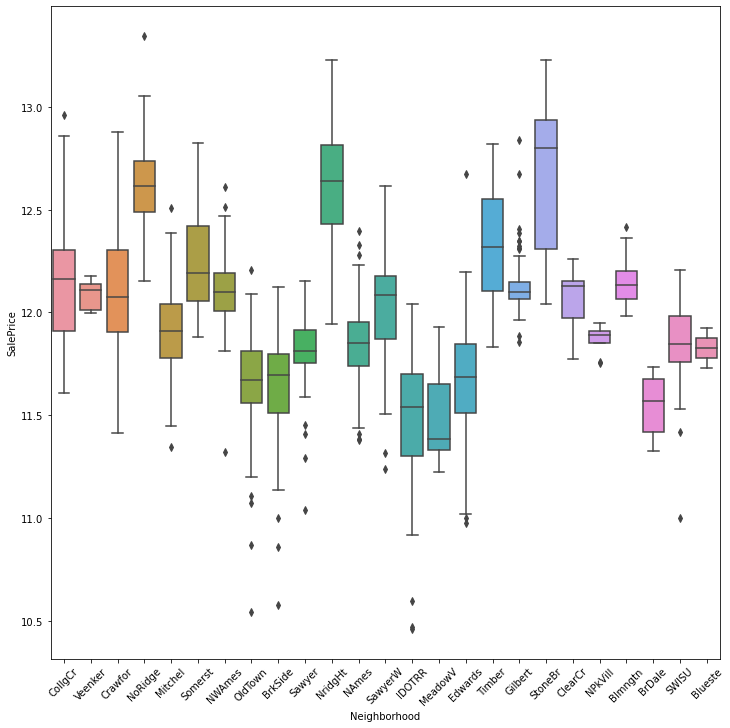

In [560]:
plt.figure(figsize = (12, 12))
sns.boxplot(data = train, x = 'Neighborhood', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

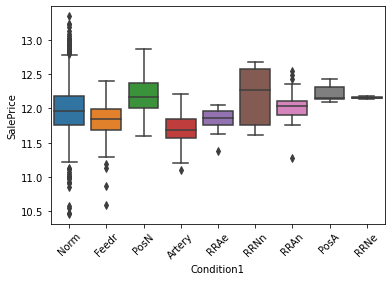

In [561]:
sns.boxplot(data = train, x = 'Condition1', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

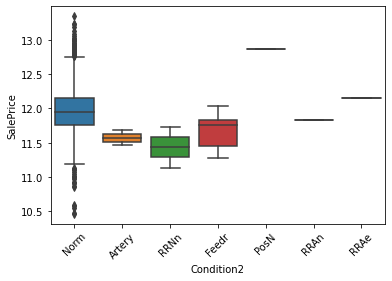

In [562]:
sns.boxplot(data = train, x = 'Condition2', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

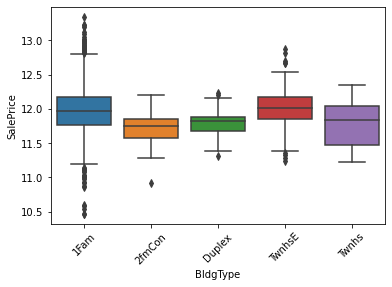

In [563]:
sns.boxplot(data = train, x = 'BldgType', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

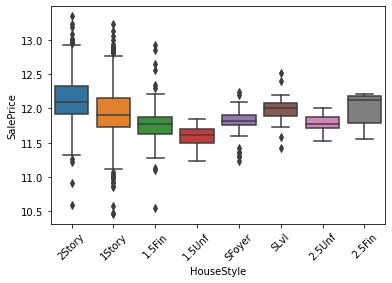

In [564]:
sns.boxplot(data = train, x = 'HouseStyle', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

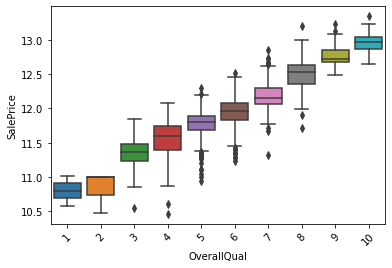

In [565]:
sns.boxplot(data = train, x = 'OverallQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

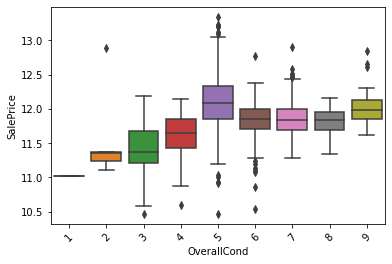

In [566]:
sns.boxplot(data = train, x = 'OverallCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

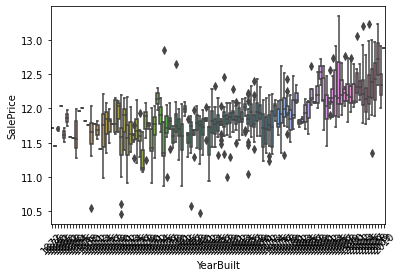

In [568]:
sns.boxplot(data = train, x = 'YearBuilt', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

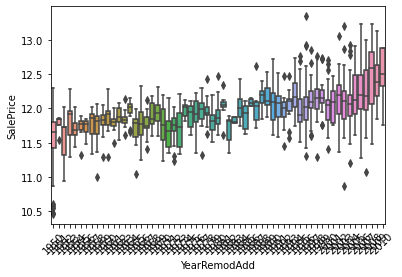

In [569]:
sns.boxplot(data = train, x = 'YearRemodAdd', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

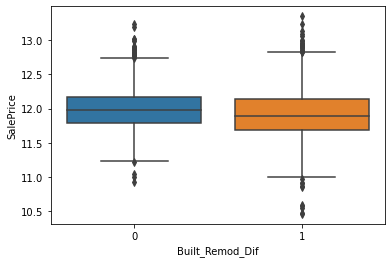

In [579]:
#리모델링 여부 (별차이가 없음)
train.loc[:, 'Built_Remod_Dif'] = train['YearRemodAdd'] - train['YearBuilt']
train['Built_Remod_Dif'] = train['Built_Remod_Dif'].apply(lambda x : 1 if x != 0 else 0)
sns.boxplot(data = train, x = 'Built_Remod_Dif', y = 'SalePrice')
train.drop('Built_Remod_Dif', axis = 1, inplace = True)

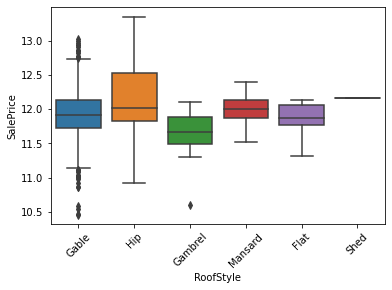

In [580]:
sns.boxplot(data = train, x = 'RoofStyle', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

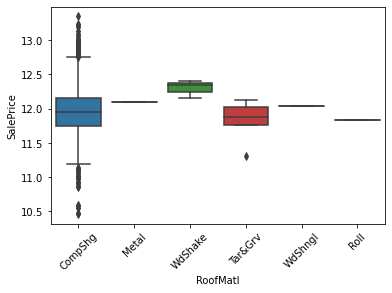

In [581]:
sns.boxplot(data = train, x = 'RoofMatl', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

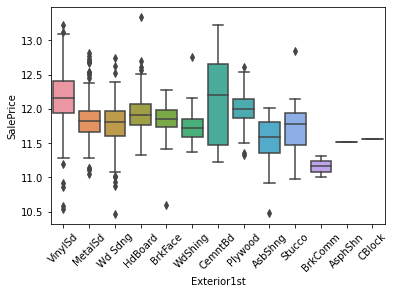

In [582]:
# 집 외부 덮개
sns.boxplot(data = train, x = 'Exterior1st', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

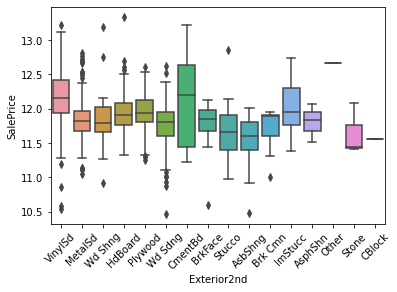

In [583]:
# 집 외부 덮개 (자재가 2개 이상인 경우)
sns.boxplot(data = train, x = 'Exterior2nd', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

1층과 2층은 병합해도 될듯하다

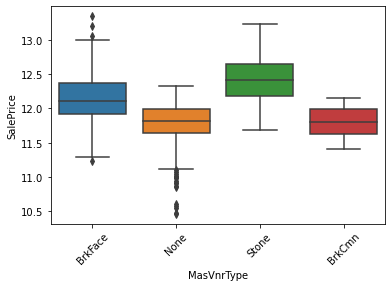

In [588]:
# 석조 베니어 타입
sns.boxplot(data = train, x = 'MasVnrType', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

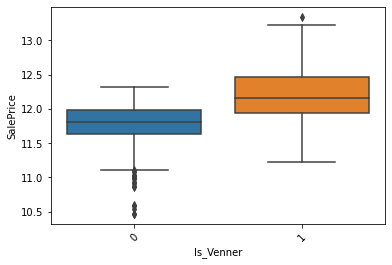

In [592]:
train['Is_Venner'] = train['MasVnrType'].apply(lambda x : 0 if x == 'None' else 1)
sns.boxplot(data = train, x = 'Is_Venner', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Is_Venner', axis = 1)
plt.show()

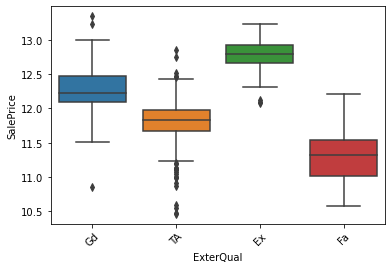

In [613]:
#외부 재료의 품질
sns.boxplot(data = train, x = 'ExterQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

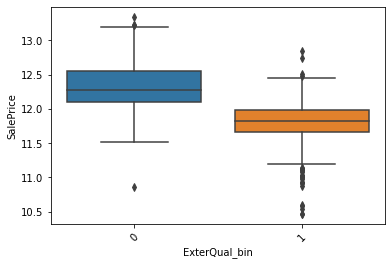

In [669]:
train['ExterQual_bin'] = train['ExterQual'].apply(lambda x : 1 if x in ['TA', 'Fa'] else 0)
sns.boxplot(data = train, x = 'ExterQual_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('ExterQual_bin', axis = 1, inplace = True)
plt.show()

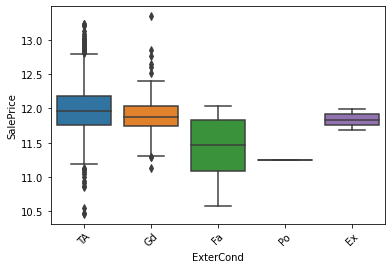

In [616]:
#외부 재료의 현재상태
sns.boxplot(data = train, x = 'ExterCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

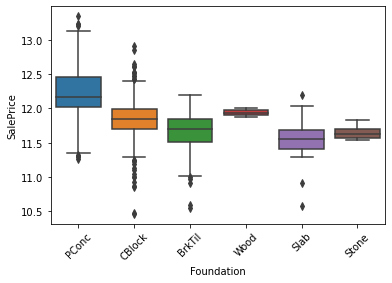

In [620]:
# 건물의 토대 타입
sns.boxplot(data = train, x = 'Foundation', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

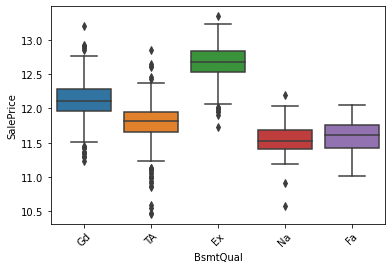

In [621]:
# 지하의 높이 평가
sns.boxplot(data = train, x = 'BsmtQual', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

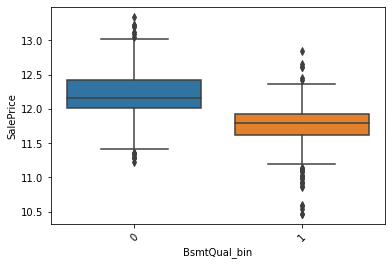

In [622]:
train['BsmtQual_bin'] = train['BsmtQual'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
sns.boxplot(data = train, x = 'BsmtQual_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('BsmtQual_bin', axis = 1, inplace = True)
plt.show()

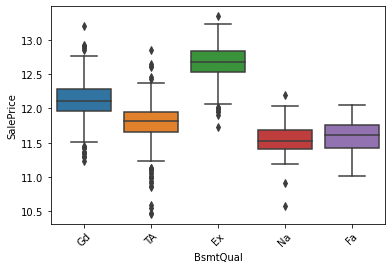

In [634]:
# 지하의 상태 평가
sns.boxplot(data = train, x = 'BsmtCond', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

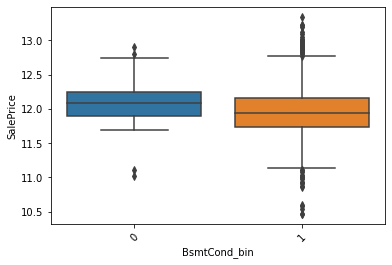

In [670]:
train['BsmtCond_bin'] = train['BsmtCond'].apply(lambda x : 1 if x in ['TA', 'Fa', 'Na'] else 0)
sns.boxplot(data = train, x = 'BsmtCond_bin', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('BsmtCond_bin', axis = 1, inplace = True)
plt.show()

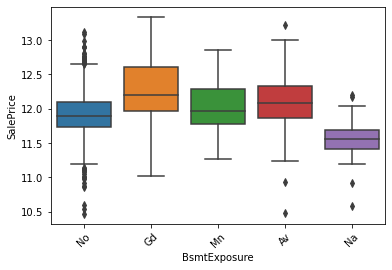

In [640]:
# 정원 상태
sns.boxplot(data = train, x = 'BsmtExposure', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

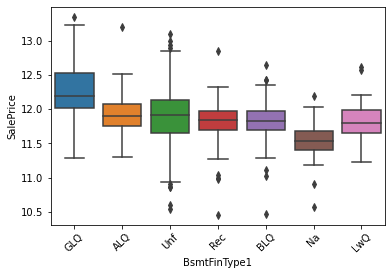

In [642]:
# 지하 1층 상태
sns.boxplot(data = train, x = 'BsmtFinType1', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

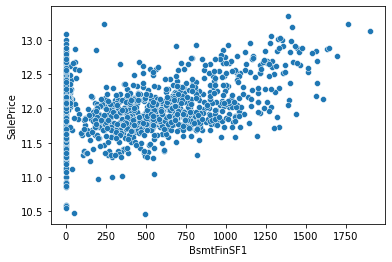

In [644]:
sns.scatterplot(data = train, x = 'BsmtFinSF1', y = 'SalePrice')

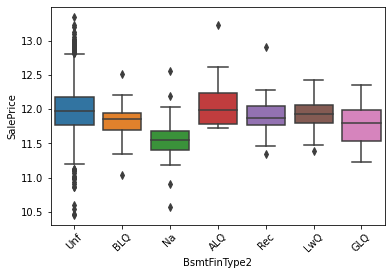

In [647]:
# 지하 2층 상태
sns.boxplot(data = train, x = 'BsmtFinType2', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

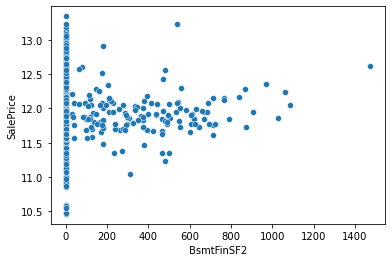

In [650]:
sns.scatterplot(data = train, x = 'BsmtFinSF2', y = 'SalePrice')

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

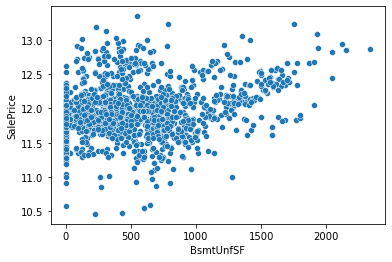

In [652]:
sns.scatterplot(data = train, x = 'BsmtUnfSF', y = 'SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

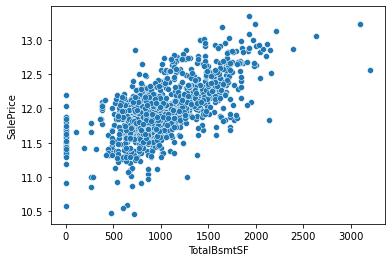

In [655]:
sns.scatterplot(data = train, x = 'TotalBsmtSF', y = 'SalePrice')

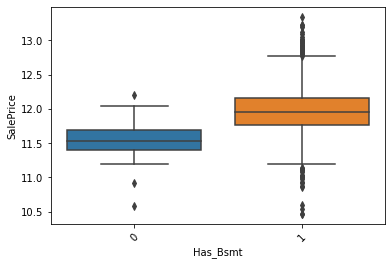

In [668]:
train['Has_Bsmt'] = train['TotalBsmtSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_Bsmt', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Has_Bsmt', axis = 1, inplace = True)
plt.show()

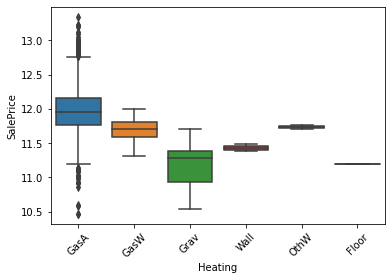

In [656]:
# 히터 타입
sns.boxplot(data = train, x = 'Heating', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

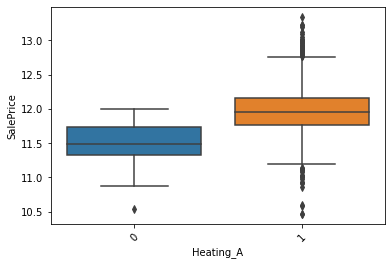

In [666]:
train['Heating_A'] = train['Heating'].apply(lambda x : 1 if x == 'GasA' else 0)
sns.boxplot(data = train, x = 'Heating_A', y = 'SalePrice')
plt.xticks(rotation = 45)
train.drop('Heating_A', axis = 1, inplace = True)
plt.show()

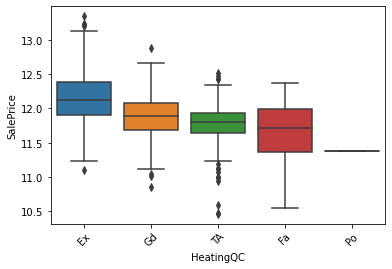

In [659]:
# 히터 퀄리티
sns.boxplot(data = train, x = 'HeatingQC', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

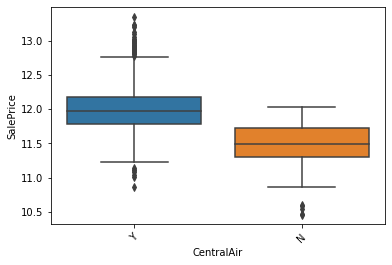

In [661]:
# 중앙 에어컨 컨디션
sns.boxplot(data = train, x = 'CentralAir', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

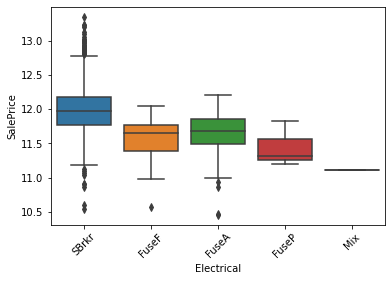

In [662]:
# 전기 시스템
sns.boxplot(data = train, x = 'Electrical', y = 'SalePrice')
plt.xticks(rotation = 45)
plt.show()

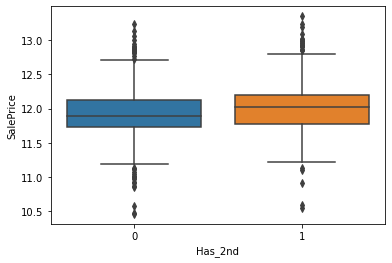

In [675]:
train['Has_2nd'] = train['2ndFlrSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_2nd', y = 'SalePrice')
train.drop('Has_2nd', axis = 1, inplace = True)

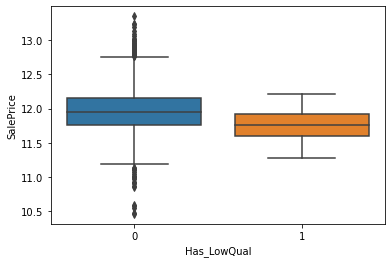

In [678]:
train['Has_LowQual'] = train['LowQualFinSF'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x = 'Has_LowQual', y = 'SalePrice')
train.drop('Has_LowQual', axis = 1, inplace = True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

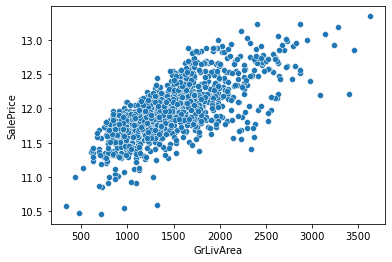

In [682]:
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

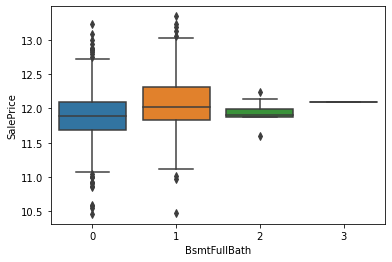

In [684]:
sns.boxplot(data = train, x= 'BsmtFullBath', y = 'SalePrice')

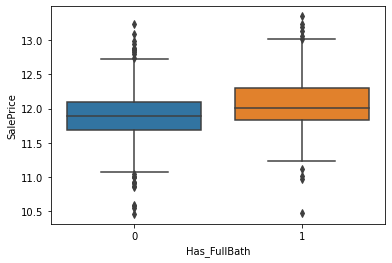

In [685]:
# FullBath 의 갯수
train['Has_FullBath'] = train['BsmtFullBath'].apply(lambda x : 0 if x == 0 else 1)
sns.boxplot(data = train, x= 'Has_FullBath', y = 'SalePrice')
train.drop('Has_FullBath', axis = 1, inplace = True)

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

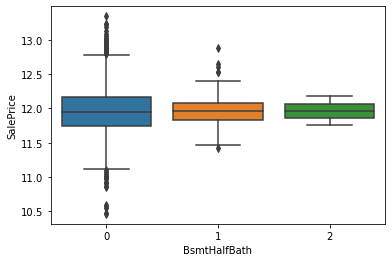

In [686]:
sns.boxplot(data = train, x= 'BsmtHalfBath', y = 'SalePrice')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

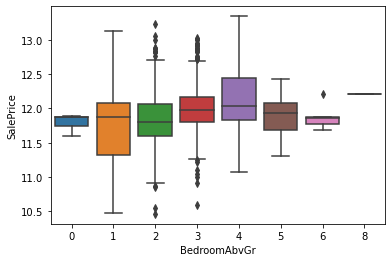

In [691]:
# 1등급 이상의 침실
sns.boxplot(data = train, x= 'BedroomAbvGr', y = 'SalePrice')